<a href="https://colab.research.google.com/github/Eyob-T295/pyshark/blob/master/Torchsig_data_modulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install torchsig
!pip install torchsig
# Install other dependencies
!pip install torch torchvision torchaudio numpy matplotlib


ERROR: Could not find a version that satisfies the requirement torchsig (from versions: none)
ERROR: No matching distribution found for torchsig
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 73.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found exi

In [ ]:
!git clone https://github.com/TorchDSP/torchsig.git

Cloning into 'torchsig'...
remote: Enumerating objects: 1973, done.
remote: Counting objects: 100% (654/654), done.
remote: Compressing objects: 100% (353/353), done.
remote: Total 1973 (delta 467), reused 301 (delta 301), pack-reused 1319 (from 2)
Receiving objects: 100% (1973/1973), 34.23 MiB | 16.94 MiB/s, done.
Resolving deltas: 100% (1070/1070), done.


In [ ]:
!pip install ./torchsig

Processing ./torchsig
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torchsig: filename=torchsig-0.6.0-py3-none-any.whl size=199395 sha256=26d45ee9297db24af57c877b723e29e40aaf85fe404d9fe62128cfa921f6af02
  Stored in directory: /tmp/pip-ephem-wheel-cache-l23zzk5c/wheels/f7/e5/37/261c83b5aecd366541de20e71702bd50b405a9904196fa962d
Successfully built torchsig
  Attempting uninstall: torchsig
    Found existing installation: torchsig 0.6.0
    Uninstalling torchsig-0.6.0:
      Successfully uninstalled torchsig-0.6.0


In [4]:
import torchsig
from torchsig.datasets import __all__

print(__all__)


ImportError: cannot import name '__all__' from 'torchsig.datasets' (/usr/local/lib/python3.11/dist-packages/torchsig/datasets/__init__.py)

In [5]:
from torchsig.datasets.modulations import ModulationsDataset


/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


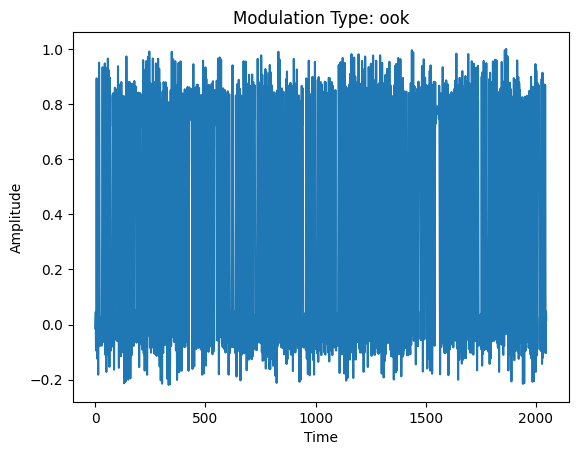

In [8]:
# Visualize the sample signal (directly using sample as a numpy array)
import matplotlib.pyplot as plt

plt.plot(sample)  # sample is already a numpy array
plt.title(f"Modulation Type: {label}")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!pip install scipy librosa


In [11]:
import scipy.io.wavfile as wav
import numpy as np

# Load the 4ASK .wav file
sample_rate, signal = wav.read('/content/FSK4  Chinese PRC-FSK4 4 x 100 Bd on 14062 kHz.wav')

# Check signal shape and sample rate
print(f"Signal shape: {signal.shape}")
print(f"Sample rate: {sample_rate}")


Signal shape: (227712,)
Sample rate: 11025


In [12]:
# Normalize signal (optional, depending on your dataset's expectations)
signal = signal / np.max(np.abs(signal))


In [13]:
# Let's assume your signal is single-channel (mono), if not, use just one channel
if len(signal.shape) > 1:
    signal = signal[:, 0]

# Convert signal to the format expected by your dataset
# For example, you may need to convert to tensor, or apply dataset transforms

import torch
signal_tensor = torch.tensor(signal, dtype=torch.float32)

# Apply any preprocessing or transformations here (e.g., scaling, reshaping)

# Test the signal by passing to the model or dataset
# In this case, you'd either test it directly with the dataset or use a pre-trained model
print(f"Processed signal: {signal_tensor.shape}")


Processed signal: torch.Size([227712])


In [16]:
import torch
import torch.nn as nn

class ModulationModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(ModulationModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return self.softmax(x)

# Example configuration
input_size = 1024  # Assuming the signal is represented as a 1024-dimensional vector
num_classes = 8    # Number of modulation classes (e.g., OOK, PSK, QAM, etc.)

# Initialize model
model = ModulationModel(input_size, num_classes)


In [20]:
from scipy.io import wavfile

# Corrected file path (make sure to use the correct path to your file)
file_path = '/content/FSK4  Chinese PRC-FSK4 4 x 100 Bd on 14062 kHz.wav'

# Load your signal from the .wav file
sample_rate, signal = wavfile.read(file_path)

# Normalize the signal to the range [-1, 1]
signal = signal / np.max(np.abs(signal), axis=0)

# Convert to tensor
signal_tensor = torch.tensor(signal, dtype=torch.float32)

# If the model expects a 1D feature vector, reshape accordingly
signal_tensor = signal_tensor.view(1, -1)  # Adjust the shape as needed


In [21]:
# Run the signal through the model
with torch.no_grad():
    predicted_modulation = model(signal_tensor)
    predicted_label = torch.argmax(predicted_modulation, dim=1)
    print(f"Predicted modulation class: {predicted_label.item()}")


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x227712 and 1024x128)